The goal of this program is to create a regression in the form of: $$\Delta T_{step}(t) = P_{diss}R_{th}\sum_{i = 0}^{\tau_N}a_i(1-b_ie^\frac{-t}{\tau_i})$$
where $P_{diss}$ and $R_{th}$ are previously known constants to an arbitrary $\tau_N$

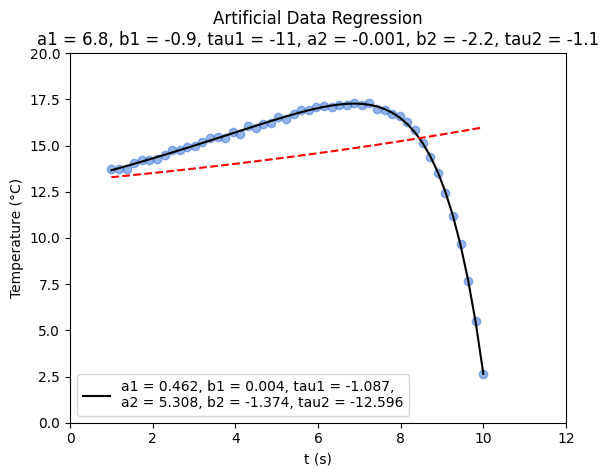

In [10]:
# The following generalized cooling regression code was written by Jacob Ivanov
# *params variable is a comma-seperated list with the following format:
# a_1, b_1, tau_1, a_2, b_2, tau_2, ... a_N, b_N, tau_N

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

P_diss, R_th = 1, 1

def cooling(t, *params):
   a_list = []
   b_list = []
   tau_list = []
   for i_term in range(0, len(params)):
      if i_term % 3 == 0:
         a_list.append(params[i_term])
      if i_term % 3 == 1:
         b_list.append(params[i_term])
      if i_term % 3 == 2:
         tau_list.append(params[i_term])
   
   # DEBUG TOOL, SHOWS a_list, b_list, tau_list ARE CORRECTLY GENERATED FROM *params

   # print(*a_list)
   # print(*b_list)
   # print(*tau_list)

   N = len(params) // 3
   sum_ = 0

   for term in range(1, N + 1):
      # print(a_list[term - 1])
      # print(b_list[term - 1])
      # print(tau_list[term - 1])

      if True: #tau_list[term - 1] < 0.001 and tau_list[term - 1] > -0.001:
         sum_ += a_list[term - 1] * (1 - b_list[term - 1] * np.exp(-t / tau_list[term - 1]))
      else:
         sum_ += a_list[term - 1] # if tau = 0, whole term becomes (1 - 0)
      # print("sum = " + str(sum_))
      # print("\n")

   return P_diss * R_th * sum_

def cooling1(t, a1, b1, tau1):
   return cooling(t, a1, b1, tau1)

def cooling2(t, a1, b1, tau1, a2, b2, tau2):
   return cooling(t, a1, b1, tau1, a2, b2, tau2)

def cooling3(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3):
   return cooling(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3)

def cooling4(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3, a4, b4, tau4):
   return cooling(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3, a4, b4, tau4)

def cooling5(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3, a4, b4, tau4, a5, b5, tau5):
   return cooling(t, a1, b1, tau1, a2, b2, tau2, a3, b3, tau3, a4, b4, tau4, a5, b5, tau5)



# "DATA" GENERATION
# Test 1: t_i, 1, 1, 1.00316, -6.97545, 15.9687, 1.00316, -1.99001, 2.99687

random.seed("123")
t = np.linspace(1, 10)
T_test1 = []
for t_i in t:
   # T_test1.append(cooling(t_i, 1.00316, -6.97545, 15.9687, 1.00316, -1.99001, 2.99687) + random.random() / 3)
   T_test1.append(cooling(t_i, 6.8, -0.9, -11,  -0.001, -2.2, -1.1) + random.random() / 3)

# print(T_test1)
# print(cooling(6.8, 6.8, -0.9, 11,  -0.001, -2.2, 1.1))
T_test1 = np.array(T_test1)
random.seed("124")

'''

T_test2 = []
for t_i in t:
   T_test2.append(cooling(t_i, 1.00316, -6.97545, 15.9687, 1.00316, 1.99001, 2.99687) + random.random() / 3)
T_test2 = np.array(T_test2)

'''

plt.scatter(t, T_test1, color = "#2e6fd9", alpha = 0.5)
# plt.scatter(t, T_test2, color = "#ffd602", alpha = 0.5)


def func(x, m, b):
   return m * x + b

bounds_ = (np.array([-10, -10, -15]), np.array([10, 10, -0.01]))
bounds_2 = (np.array([-10, -10, -15, -10, -10, -15]), np.array([10, 10, -0.01, 10, 10, -0.01]))

cooling_params, cooling_covars = curve_fit(cooling1, t, T_test1, bounds = bounds_)
cooling_params2, cooling_covars2 = curve_fit(cooling2, t, T_test1, bounds = bounds_2)

'''
T_fit = []
for t_i in t:
   T_fit.append(cooling_params[0] * t_i + cooling_params[1])
T_fit = np.array(T_fit)
'''

T_fit = []
for t_i in t:
   T_fit.append(cooling(t_i, cooling_params[0], cooling_params[1], cooling_params[2]))
T_fit = np.array(T_fit)

T_fit2 = []
for t_i in t:
   T_fit2.append(cooling(t_i, cooling_params2[0], cooling_params2[1], cooling_params2[2], cooling_params2[3], cooling_params2[4], cooling_params2[5]))
T_fit2 = np.array(T_fit2)

plt.xlim([0, 12])
plt.ylim([0, 20])
plt.plot(t, T_fit2, color = "black", alpha = 1, linestyle = 'solid', label = "a1 = {0:.3f}, b1 = {1:.3f}, tau1 = {2:.3f},\na2 = {3:.3f}, b2 = {4:.3f}, tau2 = {5:.3f}".format(cooling_params2[0], cooling_params2[1], cooling_params2[2], cooling_params2[3], cooling_params2[4], cooling_params2[5]))
plt.plot(t, T_fit, color = "red", alpha = 1, linestyle = 'dashed')
plt.xlabel("t (s)")
plt.ylabel("Temperature (°C)")
plt.title("Artificial Data Regression\na1 = {0}, b1 = {1}, tau1 = {2}, a2 = {3}, b2 = {4}, tau2 = {5}".format(6.8, -0.9, -11,  -0.001, -2.2, -1.1))
plt.legend(loc = 'lower left')